Loading the Data into Spark DataFrames

In [0]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("HealthCareDataAnalysis").getOrCreate()

# Load the data
claims_df = spark.read.json("/Volumes/healthcaredatacleaningw/default/data/claims.json")
disease_df = spark.read.csv("/Volumes/healthcaredatacleaningw/default/data/disease.csv", header=True, inferSchema=True)
group_df = spark.read.csv("/Volumes/healthcaredatacleaningw/default/data/group.csv", header=True, inferSchema=True)
grpsubgrp_df = spark.read.csv("/Volumes/healthcaredatacleaningw/default/data/grpsubgrp.csv", header=True, inferSchema=True)
hospital_df = spark.read.csv("/Volumes/healthcaredatacleaningw/default/data/hospital.csv", header=True, inferSchema=True)
patient_records_df = spark.read.csv("/Volumes/healthcaredatacleaningw/default/data/Patient_records.csv", header=True, inferSchema=True)
subgroup_df = spark.read.csv("/Volumes/healthcaredatacleaningw/default/data/subgroup.csv", header=True, inferSchema=True)
subscriber_df = spark.read.csv("/Volumes/healthcaredatacleaningw/default/data/subscriber.csv", header=True, inferSchema=True)

# Show data
claims_df.show()
disease_df.show()
group_df.show()
grpsubgrp_df.show()
hospital_df.show()
patient_records_df.show()
subgroup_df.show()
subscriber_df.show()




+-----------------+----------+------------+----------+--------+----------------+----------------+----------+
|Claim_Or_Rejected|    SUB_ID|claim_amount|claim_date|claim_id|      claim_type|    disease_name|patient_id|
+-----------------+----------+------------+----------+--------+----------------+----------------+----------+
|                N| SUBID1000|       79874|1949-03-14|       0| claims of value|    Galactosemia|    187158|
|              NaN|SUBID10001|      151142|1970-03-16|       1|claims of policy|  Bladder cancer|    112766|
|              NaN|SUBID10002|       59924|2008-02-03|       2| claims of value|   Kidney cancer|    199252|
|              NaN|SUBID10003|      143120|1995-02-08|       3|  claims of fact|         Suicide|    133424|
|                Y|SUBID10004|      168634|1967-05-23|       4| claims of value|    Food allergy|    172579|
|              NaN|SUBID10005|       64840|1991-10-04|       5|claims of policy|        Whiplash|    171320|
|                N|

Check for Null Values

In [0]:
from pyspark.sql.functions import col, count, when

# Function to check for null values
def check_nulls(df):
    return df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# Check for null values
check_nulls(claims_df)
check_nulls(disease_df)
check_nulls(group_df)
check_nulls(grpsubgrp_df)
check_nulls(hospital_df)
check_nulls(patient_records_df)
check_nulls(subgroup_df)
check_nulls(subscriber_df)


+-----------------+------+------------+----------+--------+----------+------------+----------+
|Claim_Or_Rejected|SUB_ID|claim_amount|claim_date|claim_id|claim_type|disease_name|patient_id|
+-----------------+------+------------+----------+--------+----------+------------+----------+
|                0|     0|           0|         0|       0|         0|           0|         0|
+-----------------+------+------------+----------+--------+----------+------------+----------+

+--------+-----------+------------+
|SubGrpID| Disease_ID|Disease_name|
+--------+-----------+------------+
|       0|          0|           0|
+--------+-----------+------------+

+-------+---------------+-------+------+--------+--------+----+----+
|Country|premium_written|zipcode|Grp_Id|Grp_Name|Grp_Type|city|year|
+-------+---------------+-------+------+--------+--------+----+----+
|      0|              0|      0|     0|       0|       0|   0|   0|
+-------+---------------+-------+------+--------+--------+----+----

Replacing Null Values

In [0]:
# Replace null values with "NA"
claims_df = claims_df.fillna("NA")
disease_df = disease_df.fillna("NA")
group_df = group_df.fillna("NA")
grpsubgrp_df = grpsubgrp_df.fillna("NA")
hospital_df = hospital_df.fillna("NA")
patient_records_df = patient_records_df.fillna("NA")
subgroup_df = subgroup_df.fillna("NA")
subscriber_df = subscriber_df.fillna("NA")


Checking for Duplicates

In [0]:
# Function to drop duplicates
def drop_duplicates(df):
    return df.dropDuplicates()

# Dropping duplicates if any
claims_df = drop_duplicates(claims_df)
disease_df = drop_duplicates(disease_df)
group_df = drop_duplicates(group_df)
grpsubgrp_df = drop_duplicates(grpsubgrp_df)
hospital_df = drop_duplicates(hospital_df)
patient_records_df = drop_duplicates(patient_records_df)
subgroup_df = drop_duplicates(subgroup_df)
subscriber_df = drop_duplicates(subscriber_df)


Save Cleaned Data

In [0]:
# Save cleaned data as Parquet files
claims_df.write.mode("overwrite").parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/claims_cleaned.parquet")
disease_df.write.mode("overwrite").parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/disease_cleaned.parquet")
group_df.write.mode("overwrite").parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/group_cleaned.parquet")
grpsubgrp_df.write.mode("overwrite").parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/grpsubgrp_cleaned.parquet")
hospital_df.write.mode("overwrite").parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/hospital_cleaned.parquet")
patient_records_df.write.mode("overwrite").parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/patient_records_cleaned.parquet")
subgroup_df.write.mode("overwrite").parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/subgroup_cleaned.parquet")
subscriber_df.write.mode("overwrite").parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/subscriber_cleaned.parquet")



Analysis Requirements: Load Cleaned Data

In [0]:
# Load cleaned data
claims_cleaned_df = spark.read.parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/claims_cleaned.parquet")
disease_cleaned_df = spark.read.parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/disease_cleaned.parquet")
group_cleaned_df = spark.read.parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/group_cleaned.parquet")
grpsubgrp_cleaned_df = spark.read.parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/grpsubgrp_cleaned.parquet")
hospital_cleaned_df = spark.read.parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/hospital_cleaned.parquet")
patient_records_cleaned_df = spark.read.parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/patient_records_cleaned.parquet")
subgroup_cleaned_df = spark.read.parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/subgroup_cleaned.parquet")
subscriber_cleaned_df = spark.read.parquet("/Volumes/healthcaredatacleaningw/default/cleaned_data/subscriber_cleaned.parquet")


Perform Analysis: Identify diseases with maximum claims

Disease with maximum claims: Row(disease_name='Pet allergy', count=3)


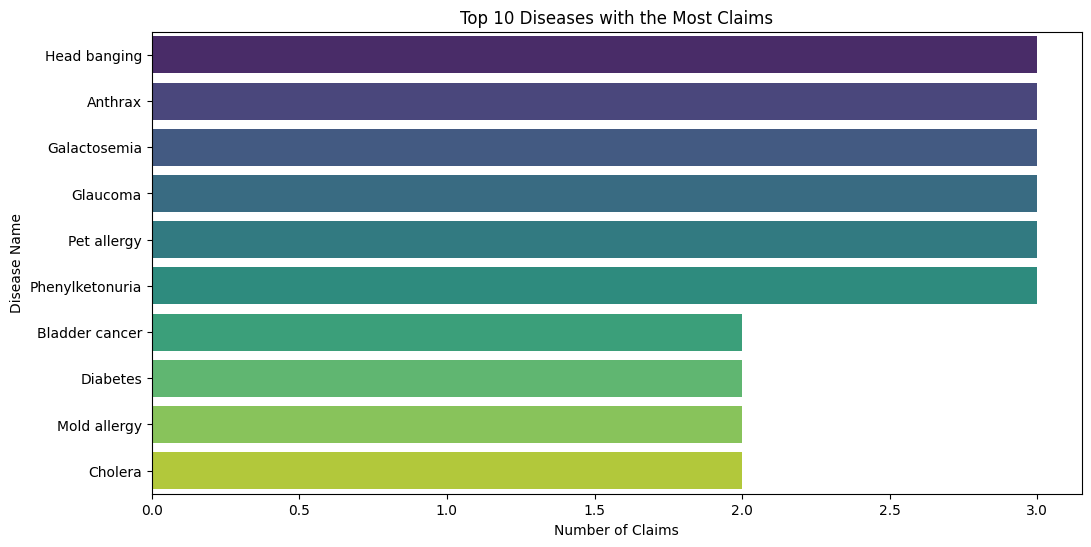

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate the top 10 diseases with the most claims
top_diseases = claims_cleaned_df.groupBy("disease_name").count().orderBy("count", ascending=False).limit(10)
print("Disease with maximum claims:", max_claims_disease)

top_diseases_pd = top_diseases.toPandas()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='disease_name', data=top_diseases_pd, palette='viridis')
plt.title('Top 10 Diseases with the Most Claims')
plt.xlabel('Number of Claims')
plt.ylabel('Disease Name')
plt.show()

Subscribers under 30 with subgroup subscriptions

In [0]:
from pyspark.sql.functions import col, expr

# Check the column names in the DataFrame
display(subscriber_cleaned_df)
subscribers_under_30 = subscriber_cleaned_df.filter(col("Birth_date") < expr("date '1990-01-01'"))
display(subscribers_under_30)

sub _id,first_name,last_name,Street,Birth_date,Gender,Phone,Country,City,Zip Code,Subgrp_id,Elig_ind,eff_date,term_date
SUBID10013,Brahmvir,Rai,Shah Path,1991-11-11,Male,+91 7316972612,India,Ambala,249898,S106,N,2011-11-11,2020-05-23
SUBID10046,Aayushmaan,Maurya,Johal Nagar,1983-11-14,Female,+91 4464709769,India,Mehsana,987281,S104,Y,2003-11-14,2012-10-22
SUBID10049,Paridhi,Yadav,Sant Path,1959-03-27,Female,+91 2139280879,India,Jabalpur,883754,NA,N,1979-03-27,1985-06-01
SUBID10012,Dharmadaas,Tiwari,Rama,1964-04-29,Male,+91 6345482027,India,Bhalswa Jahangir Pur,430793,S103,N,1984-04-29,1988-02-07
SUBID1065,Dipesh,Mishra,Char Path,1949-04-01,Female,+91 5851958964,India,Kochi,31269,S103,Y,1969-04-01,1970-06-02
SUBID10011,NA,Vishwakarma,Rajagopalan,1955-01-22,Female,+91 4146391938,India,Ghaziabad,337042,S106,N,1975-01-22,1978-11-02
SUBID10051,NA,Rajput,Chauhan Chowk,1946-10-17,Male,+91 9887324437,India,Baranagar,765234,S103,Y,1966-10-17,1969-06-26
SUBID1041,NA,Rajput,Sinha Path,1930-11-25,Female,NA,India,Agartala,303503,S110,Y,1950-11-25,1957-09-14
SUBID10075,NA,Singh,Iyengar Nagar,1956-01-29,Male,+91 6891482136,India,Navi Mumbai,836175,S107,N,1976-01-29,1979-05-25
SUBID1030,Upasana,Pandey,Seth Chowk,1956-06-01,Male,+91 0548234943,India,Hyderabad,234823,S102,N,1976-06-01,1981-02-14


sub _id,first_name,last_name,Street,Birth_date,Gender,Phone,Country,City,Zip Code,Subgrp_id,Elig_ind,eff_date,term_date
SUBID10046,Aayushmaan,Maurya,Johal Nagar,1983-11-14,Female,+91 4464709769,India,Mehsana,987281,S104,Y,2003-11-14,2012-10-22
SUBID10049,Paridhi,Yadav,Sant Path,1959-03-27,Female,+91 2139280879,India,Jabalpur,883754,NA,N,1979-03-27,1985-06-01
SUBID10012,Dharmadaas,Tiwari,Rama,1964-04-29,Male,+91 6345482027,India,Bhalswa Jahangir Pur,430793,S103,N,1984-04-29,1988-02-07
SUBID1065,Dipesh,Mishra,Char Path,1949-04-01,Female,+91 5851958964,India,Kochi,31269,S103,Y,1969-04-01,1970-06-02
SUBID10011,NA,Vishwakarma,Rajagopalan,1955-01-22,Female,+91 4146391938,India,Ghaziabad,337042,S106,N,1975-01-22,1978-11-02
SUBID10051,NA,Rajput,Chauhan Chowk,1946-10-17,Male,+91 9887324437,India,Baranagar,765234,S103,Y,1966-10-17,1969-06-26
SUBID1041,NA,Rajput,Sinha Path,1930-11-25,Female,NA,India,Agartala,303503,S110,Y,1950-11-25,1957-09-14
SUBID10075,NA,Singh,Iyengar Nagar,1956-01-29,Male,+91 6891482136,India,Navi Mumbai,836175,S107,N,1976-01-29,1979-05-25
SUBID1030,Upasana,Pandey,Seth Chowk,1956-06-01,Male,+91 0548234943,India,Hyderabad,234823,S102,N,1976-06-01,1981-02-14
SUBID10048,Chitranjan,Mishra,Madan Nagar,1925-09-09,Female,+91 5176024720,India,Morbi,945697,S108,N,1945-09-09,1952-06-21


Group with the most subgroups

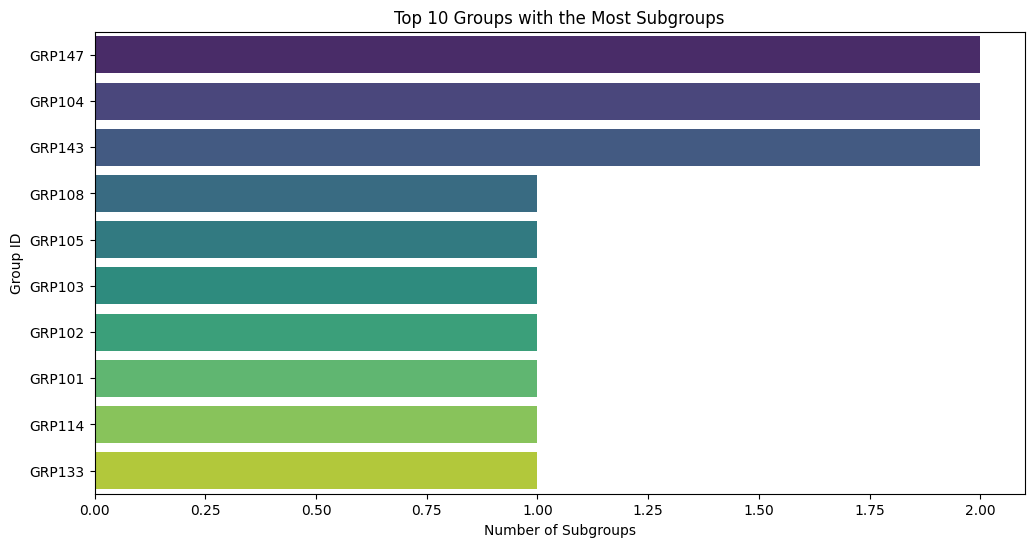

Group with maximum subgroups: Grp_Id    GRP147
count          2
Name: 0, dtype: object


In [0]:
top_groups = grpsubgrp_cleaned_df.groupBy("Grp_Id").count().orderBy("count", ascending=False).limit(10)

top_groups_pd = top_groups.toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='Grp_Id', data=top_groups_pd, palette='viridis')
plt.title('Top 10 Groups with the Most Subgroups')
plt.xlabel('Number of Subgroups')
plt.ylabel('Group ID')
plt.show()
max_subgroups_group = top_groups_pd.iloc[0]
print("Group with maximum subgroups:", max_subgroups_group)

Hospital serving most patients

In [0]:
max_patients_hospital = claims_cleaned_df.groupBy("claim_type").count().orderBy("count", ascending=False).first()
print("Hospital serving most patients:", max_patients_hospital)


Hospital serving most patients: Row(claim_type='claims of value', count=25)


Subgroup subscribed to the most

In [0]:
max_subscribed_subgroup = grpsubgrp_cleaned_df.groupBy("SubGrp_ID").count().orderBy("count", ascending=False).first()
print("Subgroup subscribed to the most:", max_subscribed_subgroup)

Subgroup subscribed to the most: Row(SubGrp_ID='S106', count=5)


Find out total number of claims which were rejected

In [0]:
rejected_claims = claims_df.filter(claims_df['Claim_Or_Rejected'] == 'N').count()
print(f"Total number of rejected claims: {rejected_claims}")

Total number of rejected claims: 22


●	From where most claims are coming (city)

In [0]:
most_claims_city = patient_records_cleaned_df.groupBy('city').count().orderBy('count', ascending=False).first()
print(f"City with most claims: {most_claims_city['city']} with {most_claims_city['count']} claims")


City with most claims: Mysore with 2 claims


Which groups of policies subscriber subscribe mostly Government or private

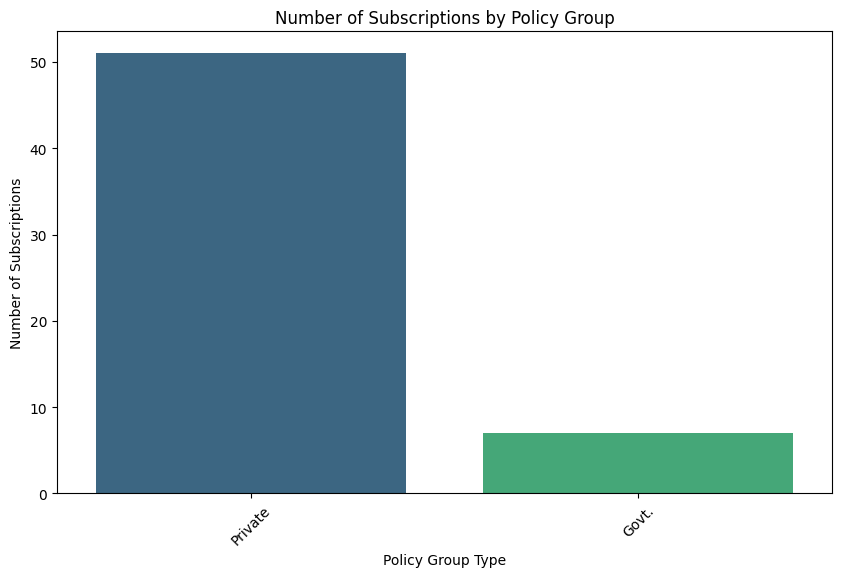

Most subscribed policy group: Private with 51 subscriptions


In [0]:
group_subscribe_counts = group_cleaned_df.groupBy('Grp_Type').count().orderBy('count', ascending=False)

group_subscribe_counts_pd = group_subscribe_counts.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Grp_Type', y='count', data=group_subscribe_counts_pd, palette='viridis')
plt.title('Number of Subscriptions by Policy Group')
plt.xlabel('Policy Group Type')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)
plt.show()

most_subscribed_group = group_subscribe_counts_pd.iloc[0]
print(f"Most subscribed policy group: {most_subscribed_group['Grp_Type']} with {most_subscribed_group['count']} subscriptions")


Average monthly premium subscriber pay to insurance company.

In [0]:
average_monthly_premium = group_cleaned_df.agg({'premium_written': 'avg'}).first()
print(f"Average monthly premium: {average_monthly_premium['avg(premium_written)']}")


Average monthly premium: 63586.206896551725


Find out Which group is most profitable

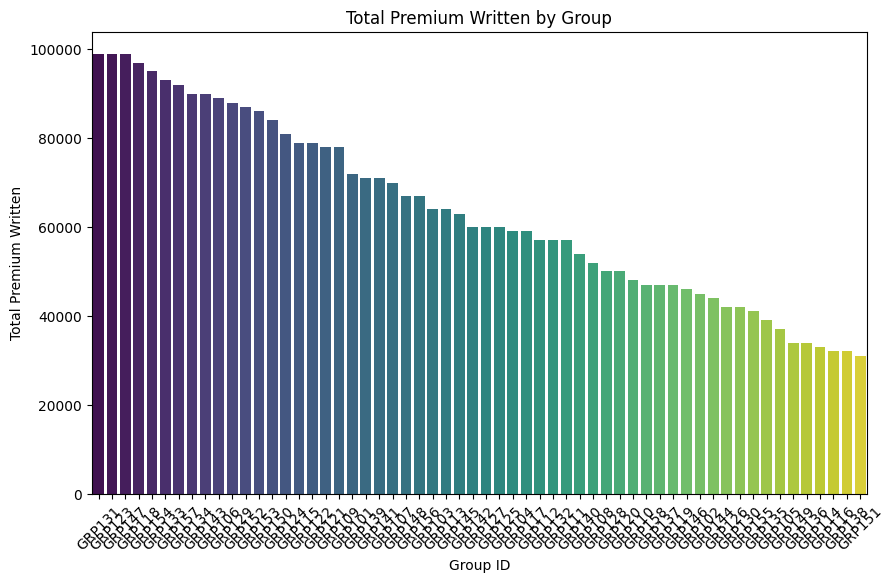

Most profitable group: GRP131 with total premium 99000


In [0]:
profitable_group_df = group_cleaned_df.groupBy('Grp_Id').agg({'premium_written': 'sum'}).orderBy('sum(premium_written)', ascending=False)

profitable_group_pd = profitable_group_df.toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x='Grp_Id', y='sum(premium_written)', data=profitable_group_pd, palette='viridis')
plt.title('Total Premium Written by Group')
plt.xlabel('Group ID')
plt.ylabel('Total Premium Written')
plt.xticks(rotation=45)
plt.show()

most_profitable_group = profitable_group_pd.iloc[0]
print(f"Most profitable group: {most_profitable_group['Grp_Id']} with total premium {most_profitable_group['sum(premium_written)']}")
